# Quant Course: Lesson 7
## Binomial Tree Model

# Agenda:

* Tree numerical method:
* Application: American and Bermudan options
* Comparison to: Analytic, PDE (can we use PDE for American? / Numerical stability), MC. What can we use it for, speed
* Coding

# The Tree method

## Recap

* European option: payoff $ \;\;\; max\lbrace S_T-K, 0\rbrace $

* Geometric Brownian motion

* Risk neutral measure

## Basic concept of binomial tree model
* at each time step the price of the underlying goes either up or down
* the model can make one or more steps
    * with one step only the modelcan be calibrated to a single European contract
    * for more complicated contracts we need more steps
* with an increasing number of steps the tree's distribution converge to log-normal, but this is not our main objective


<img src="./img/tree-notation.png" style="margin-left:auto; margin-right:auto; width: 1000px;" />

## Example: pricing European option with one-step tree

<img src="./img/1-step-example.png" style="margin-left:auto; margin-right:auto; width: 1000px;" />

### Arbitrage free price of option

Can we have the cashflow from the linear combination of A and C identical to B's cashflow?

time step| draw | bond  |  stock  | option |
---:|---:|---:|---:|---:|
$0$|$\emptyset$|$-100$|$-20$|$V_0$
$1$|$H$|$103$|$22$|$1$
$1$|$T$|$103$|$18$|$0$

Can we replicate the cashflows of the option using bonds and stock?

In [2]:
$ S_1(H)-S_1(T) = 4 (V_1(H) - V_1(T)) $

SyntaxError: invalid syntax (3821652278.py, line 1)

## Example: pricing European option with one-step tree

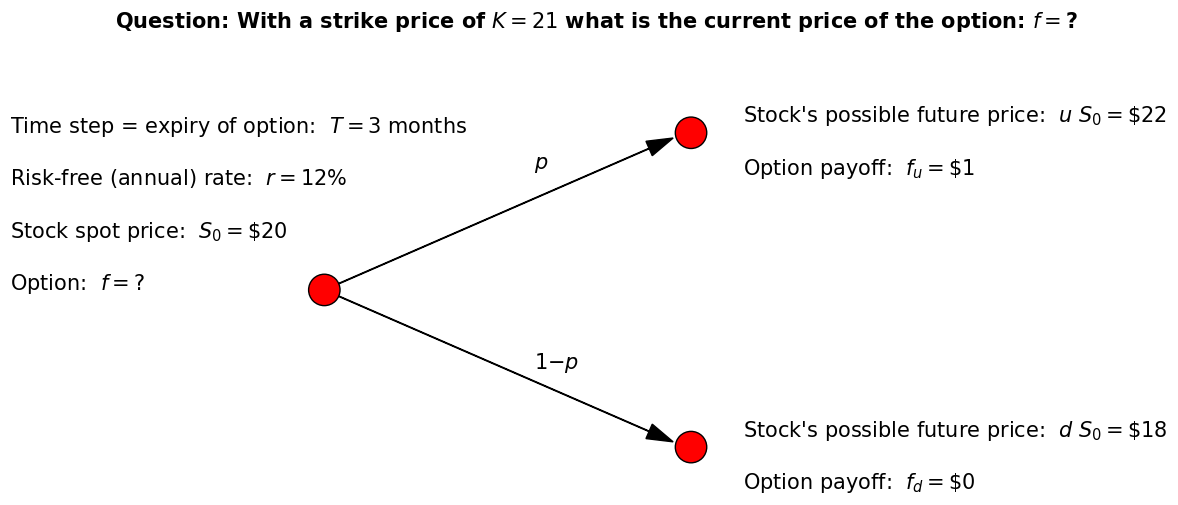

In [6]:
# === Image and text. No computation. ===

# Based on: Hull book Chapter 11, goo.gl/is8Y4S

# Importing libraries, Definitions
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 15

# A little graph with two arrows
circle_0 = Circle((.2,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_down = Circle((.9,.7), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_up = Circle((.9,.1), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_up)
ax.add_artist(circle_down)
ax.arrow(.2, .4, .66, .3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .66, -.3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.2, .4, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')

# Text around the little graph
ax.text(-.2, .9, r'Question: With a strike price of $K=21$ what is the current price of the option: $f = $?', fontsize=my_fontsize, fontweight='bold')
ax.text(-.4, .7, r'Time step = expiry of option: $\ T = 3$ months', fontsize=my_fontsize)
ax.text(-.4, .6, r'Risk-free (annual) rate: $\ r = 12\%$', fontsize=my_fontsize)
ax.text(-.4, .5, r'Stock spot price: $\ S_0 = \$20$', fontsize=my_fontsize)
ax.text(-.4, .4, r'Option: $\ f = ?$', fontsize=my_fontsize)
ax.text(1., .72, r"Stock's possible future price: $\ u\ S_0 = \$22$", fontsize=my_fontsize)
ax.text(1., .62, r'Option payoff: $\ f_u = \$1$', fontsize=my_fontsize)
ax.text(1., .12, r"Stock's possible future price: $\ d\ S_0 = \$18$", fontsize=my_fontsize)
ax.text(1., .02, r'Option payoff: $\ f_d = \$0$', fontsize=my_fontsize)
ax.text(.6, .63, r'$p$', fontsize=my_fontsize)
ax.text(.6, .25, r'$1\minus p$', fontsize=my_fontsize)

# # More text below the little graph
# x2,y2 = .1,-.3
# ax.text(x2,y2, r'Reply: Replicate a (C) call option with', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2,y2-.1, r'$\Delta$ amount of the (S) underlying stock and (R) risk-free borrowing', fontsize=my_fontsize)
# ax.text(x2, y2-.24, r'C = R + $\Delta\ $S', fontsize=my_fontsize)
# ax.text(x2-.43, y2-.35, r'$\ \ \ \Rightarrow\ \ \ $C$\ \minus$ $\Delta$ S = R', fontsize=my_fontsize)
# ax.text(x2, y2-.62, r'We are searching for the risk-neutral solution, thus:', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2, y2-.75, r'(1) $\ $C $\minus\ \Delta\ $S$\ $ should have same price in the two end nodes:', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.87, r'In the example: $\ 22\ \Delta\ \minus\ 1 = 18\ \Delta\ \ \ \Rightarrow\ \ \ $ $\Delta=0.25$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.97, r'General case: $\ \Delta=\left(f_u-f_d\right)\ /\ \left(S_0\ u-S_0\ d\right)$', fontsize=my_fontsize)
# ax.text(x2, y2-1.12, r'(2) $\ $C $\minus\ \Delta\ $S$\ $ and $\ R\ $ should change identically (risk-free rate):', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.24, r'In the example: $\ 20\ \Delta\ \minus\ f = \left(\ 22\ \Delta\ - 1\ \right)\ \exp( -r\ T\ )$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.36, r'General case:', fontsize=my_fontsize)
# ax.text(x2+.35, y2-1.48, r'where', fontsize=my_fontsize)
# ax.text(x2+.6, y2-1.36, r'$\ f = \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right] \ \exp( -r\ T\ )$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.48, r'$\ p = \left[\ \exp(\ r\ T\ ) - d\ \right]\ / \ \left[\ u - d \ \right] $', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.58, r'$\ f_d = \max\left(\ 0, d\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.68, r'$\ f_u = \max\left(\ 0, u\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')

# ax.text(x2, y2-1.92, r'Think about the following:', fontsize=my_fontsize, fontweight='bold', color='#a00000')
# ax.text(x2, y2-2.02, r'What do the following special cases mean for the', fontsize=my_fontsize)
# ax.text(x2, y2-2.12, r'time evolution of the price of the underlying stock ?', fontsize=my_fontsize)
# ax.text(x2, y2-2.26, r'(1) $u=1/d$ and $p=1/2$', fontsize=my_fontsize)
# ax.text(x2, y2-2.38, r'(2) $u\ d = exp\left(\ r\ T\ \right)$  and  $p=1/2$  ', fontsize=my_fontsize)

plt.show() # display the entire plot

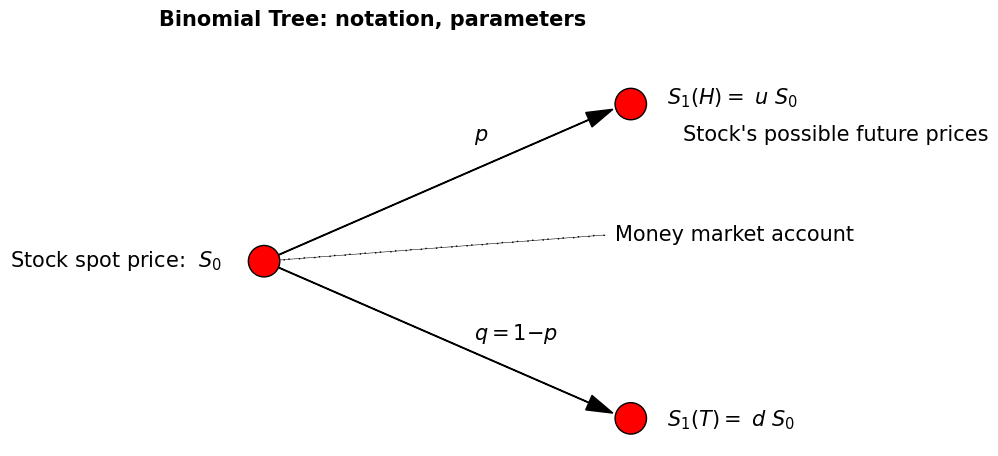

In [75]:
# === Image and text. No computation. ===

# Based on: Hull book Chapter 11, goo.gl/is8Y4S

# Importing libraries, Definitions
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 15

# A little graph with two arrows
circle_0 = Circle((.2,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_down = Circle((.9,.7), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_up = Circle((.9,.1), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_up)
ax.add_artist(circle_down)
ax.arrow(.2, .4, .66, .3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .66, -.3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.2, .4, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')

# Text around the little graph
ax.text(0.0, .85, r'Binomial Tree: notation, parameters', fontsize=my_fontsize, fontweight='bold')
ax.text(-.285, .39, r'Stock spot price: $\ S_0$', fontsize=my_fontsize)
ax.text(0.97, .7, r"$S_1(H) = \ u\ S_0$", fontsize=my_fontsize)
ax.text(1.0, .63, r"Stock's possible future prices", fontsize=my_fontsize)
ax.text(0.97, .085, r"$S_1(T) = \ d\ S_0$", fontsize=my_fontsize)
ax.text(.6, .63, r'$p$', fontsize=my_fontsize)
ax.text(.6, .25, r'$q = 1\minus p$', fontsize=my_fontsize)

ax.arrow(.2, .4, .65, 0.05, fc='k', ec='k', head_width=0.0, head_length=0.0, linestyle=(0, (1,10)))
ax.text(0.87, .44, r"Money market account", fontsize=my_fontsize)

# # More text below the little graph
# x2,y2 = .1,-.3
# ax.text(x2,y2, r'Reply: Replicate a (C) call option with', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2,y2-.1, r'$\Delta$ amount of the (S) underlying stock and (R) risk-free borrowing', fontsize=my_fontsize)
# ax.text(x2, y2-.24, r'C = R + $\Delta\ $S', fontsize=my_fontsize)
# ax.text(x2-.43, y2-.35, r'$\ \ \ \Rightarrow\ \ \ $C$\ \minus$ $\Delta$ S = R', fontsize=my_fontsize)
# ax.text(x2, y2-.62, r'We are searching for the risk-neutral solution, thus:', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2, y2-.75, r'(1) $\ $C $\minus\ \Delta\ $S$\ $ should have same price in the two end nodes:', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.87, r'In the example: $\ 22\ \Delta\ \minus\ 1 = 18\ \Delta\ \ \ \Rightarrow\ \ \ $ $\Delta=0.25$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.97, r'General case: $\ \Delta=\left(f_u-f_d\right)\ /\ \left(S_0\ u-S_0\ d\right)$', fontsize=my_fontsize)
# ax.text(x2, y2-1.12, r'(2) $\ $C $\minus\ \Delta\ $S$\ $ and $\ R\ $ should change identically (risk-free rate):', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.24, r'In the example: $\ 20\ \Delta\ \minus\ f = \left(\ 22\ \Delta\ - 1\ \right)\ \exp( -r\ T\ )$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.36, r'General case:', fontsize=my_fontsize)
# ax.text(x2+.35, y2-1.48, r'where', fontsize=my_fontsize)
# ax.text(x2+.6, y2-1.36, r'$\ f = \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right] \ \exp( -r\ T\ )$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.48, r'$\ p = \left[\ \exp(\ r\ T\ ) - d\ \right]\ / \ \left[\ u - d \ \right] $', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.58, r'$\ f_d = \max\left(\ 0, d\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.68, r'$\ f_u = \max\left(\ 0, u\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')

# ax.text(x2, y2-1.92, r'Think about the following:', fontsize=my_fontsize, fontweight='bold', color='#a00000')
# ax.text(x2, y2-2.02, r'What do the following special cases mean for the', fontsize=my_fontsize)
# ax.text(x2, y2-2.12, r'time evolution of the price of the underlying stock ?', fontsize=my_fontsize)
# ax.text(x2, y2-2.26, r'(1) $u=1/d$ and $p=1/2$', fontsize=my_fontsize)
# ax.text(x2, y2-2.38, r'(2) $u\ d = exp\left(\ r\ T\ \right)$  and  $p=1/2$  ', fontsize=my_fontsize)

plt.show() # display the entire plot

### Can we create A from B and C?

e.g.: Can we have the cashflow from the linear combination of A and C identical to B's cashflow?

years|  payoff of A  |  payoff of B  | payoff of C  |
---:|---:|---:|---:|
0|-100|-100|-100
1|10|0|112
2|110|121|0